CONJUNTO VERÓNICA


In [3]:
#LIBRERIAS----
libraries <- c("tidyverse",
               "sf", 
               "tmap", 
               "utils", 
               "readr")


installed_packages <- rownames(installed.packages())
libraries_to_install <- setdiff(libraries, installed_packages)

if (length(libraries_to_install) > 0) {
  install.packages(libraries_to_install)
}

lapply(libraries, library, character.only = TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.13.0, GDAL 3.10.1, PROJ 9.5.1; sf_use_s2() is TRUE



[[1]]
 [1] "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
 [7] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "sf"        "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "tmap"      "sf"        "lubridate" "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[4]]
 [1] "tmap"      "sf"        "lubridate" "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[5]]
 [1] "tmap"      "sf"        "lubridate" "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"

In [4]:
##SITIO DE INTERÉS
sitio <- st_as_sf(data.frame(lon = -99.172436, lat = 19.438515), 
                  coords = c("lon", "lat"), 
                  crs = 4326)|>
  st_transform(32614)


#st_write(sitio, "sitio.geojson")

buffer<- sitio|>
  st_buffer(500)|>
  mutate(sitio = "zona influencia", 
         distancia = 500)
  
##COLONIAS Y ZONA DE INTERÉS ----
colonias <- st_read("https://gitlab.com/claudiodanielpc/colonias_mx/-/raw/main/iecm_colonias_cdmx.geojson")|>
  st_transform(32614)|>
  select(UT, CVEUT, DEMARCACIO)

colonia_sitio<-sitio|>
  st_intersection(colonias)

colonias_interes<-buffer|>
  st_intersection(colonias)|>
  st_drop_geometry()|>
  as.data.frame()

zona_interes <- colonias %>%
  filter(CVEUT %in% colonias_interes$CVEUT) %>%
  mutate(area = as.numeric(st_area(geometry)) / 10000)

  #st_write(zona_interes, "zona_interes.geojson")

Reading layer `iecm_colonias_cdmx' from data source 
  `https://gitlab.com/claudiodanielpc/colonias_mx/-/raw/main/iecm_colonias_cdmx.geojson' 
  using driver `GeoJSON'
Simple feature collection with 1837 features and 10 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -99.35109 ymin: 19.12742 xmax: -98.94565 ymax: 19.59378
Geodetic CRS:  WGS 84


Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"
Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


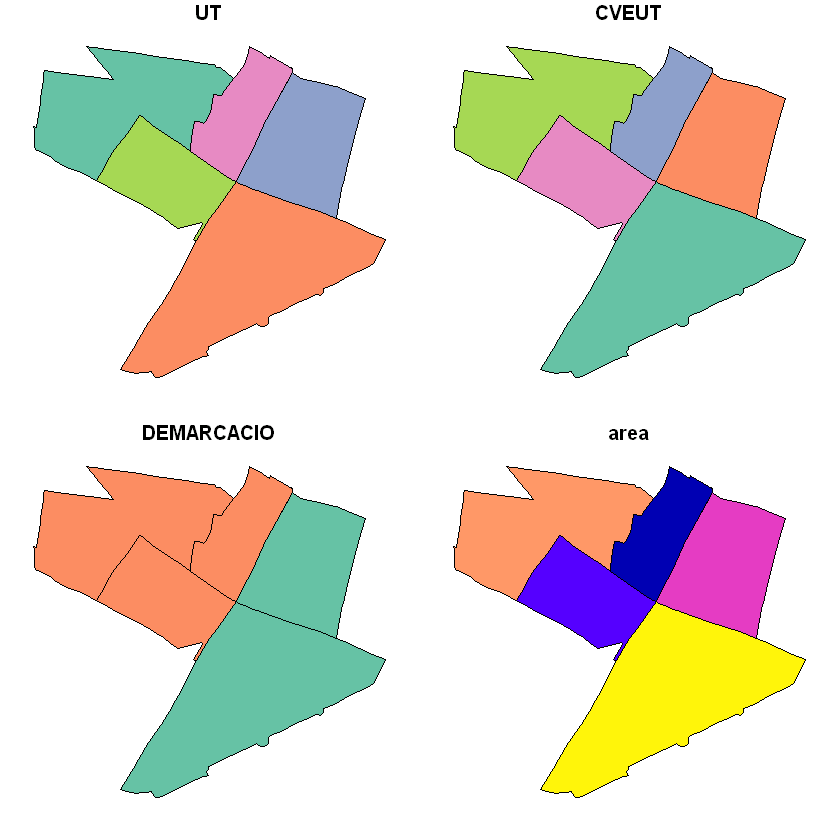

In [3]:
plot(zona_interes)

In [21]:
renta_de_vivienda <- read_csv("C:/Users/brenp/Documents/GitHub/VARIOS/renta_veronica_easyaviso.csv")|>
mutate(latitud = lat,
       longitud = lon)|>
       st_as_sf(coords = c("lon", "lat"), crs = 4326)|>
       st_transform(32614)|>
       st_intersection(zona_interes)

Rows: 237 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): oferta, fuente
dbl  (7): precio, mts, bathrooms, recamaras, lat, lon, precio_m2
dttm (1): fecha_consulta

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


Warning message:
"plotting the first 9 out of 14 attributes; use max.plot = 14 to plot all"


sf [193 × 15] (S3: sf/tbl_df/tbl/data.frame)
 $ oferta        : chr [1:193] "penthouse en renta con roof garden privado" "moderno loft con terraza cerca del angel de la independencia" "departamento en rio panuco 118 cuauhtemoc" "renta departamento en reforma" ...
 $ precio        : num [1:193] 39000 30000 15000 21000 33000 ...
 $ mts           : num [1:193] 240 134 50 45 85 98 100 127 44 74 ...
 $ bathrooms     : num [1:193] 2 NA NA NA 2 2 2 NA NA 2 ...
 $ recamaras     : num [1:193] 2 NA NA NA 2 NA 2 NA NA 2 ...
 $ fuente        : chr [1:193] "easyaviso" "easyaviso" "easyaviso" "easyaviso" ...
 $ fecha_consulta: POSIXct[1:193], format: "2025-05-07 12:28:03" "2025-05-07 12:28:03" ...
 $ precio_m2     : num [1:193] 162 224 300 467 388 ...
 $ latitud       : num [1:193] 19.4 19.4 19.4 19.4 19.4 ...
 $ longitud      : num [1:193] -99.2 -99.2 -99.2 -99.2 -99.2 ...
 $ UT            : chr [1:193] "CUAUHTEMOC" "CUAUHTEMOC" "CUAUHTEMOC" "CUAUHTEMOC" ...
 $ CVEUT         : chr [1:193] "15-009" 

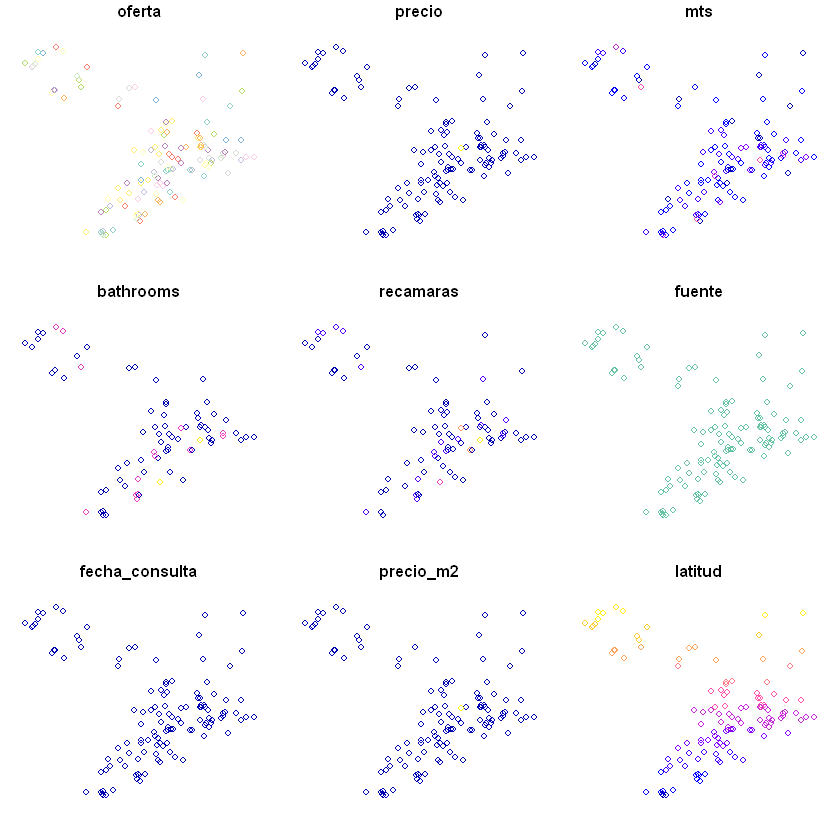

In [22]:
plot(renta_de_vivienda)
str(renta_de_vivienda)

In [ ]:
#write.csv(renta_de_vivienda, "C:/Users/brenp/Documents/GitHub/VARIOS/renta_veronica.csv")

In [34]:
renta_de_vivienda_2 <- read_csv("C:/Users/brenp/Documents/GitHub/VARIOS/renta_veronica_limpio.csv")|>
       st_as_sf(coords = c("longitud", "latitud"), crs = 4326)|>
       st_transform(32614)


 nrow(renta_de_vivienda_2)      

Rows: 173 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): oferta, fuente, UT, CVEUT, DEMARCACIO, Unnamed: 16
dbl  (8): Unnamed: 0, precio, mts, bathrooms, recamaras, precio_m2, latitud,...
lgl  (2): Unnamed: 14, Unnamed: 15
time (1): fecha_consulta

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 173

In [29]:
precios_colonias <- renta_de_vivienda_2|>
    group_by(CVEUT)|>
    summarise(precio_promedio_col = mean(precio, na.rm = TRUE))|>
    st_drop_geometry()|>
    as.data.frame()

In [32]:
precios_colonias_poligonos <- zona_interes|>
    left_join(precios_colonias, by = "CVEUT")


st_write(precios_colonias_poligonos, "C:/Users/brenp/Desktop/PREDIO MH/precios_colonias.geojson")

Writing layer `precios_colonias' to data source 
  `C:/Users/brenp/Desktop/PREDIO MH/precios_colonias.geojson' using driver `GeoJSON'
Writing 5 features with 5 fields and geometry type Multi Polygon.


In [33]:
buffer<- sitio|>
  st_buffer(250)|>
  mutate(sitio = "zona influencia", 
         distancia = 500)

precios_buffer<-renta_de_vivienda_2|>
    st_intersection(buffer)|>
    group_by(sitio)|>
    summarise(precio_promedio_buffer = mean(precio, na.rm = TRUE))|>
    st_drop_geometry()|>
    as.data.frame()

precios_buffer

Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


sitio,precio_promedio_buffer
<chr>,<dbl>
zona influencia,32250


In [ ]:
hist(predios$vus, breaks = 10,                     
     main = "Distribución de VUS",
     xlab = "Valor de VUS",
     col = "gray")
abline(v = mean(predios$vus, na.rm = TRUE), col = "red", lwd = 2, lty = 2)
abline(v = median(predios$vus, na.rm = TRUE), col = "green", lwd = 2, lty = 2)
legend("topright", legend = c("Media", "Mediana"),col = c("red", "green"),lwd = 2)


In [ ]:
##DATOS DE VIVIENDA EN LAS COLONIAS
##PRINCIPALES RESULTADOS POR MANZANA CENSO DE POBLACIÓN Y VIVIENDA 2020
url <- "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/ageb_manzana/RESAGEBURB_09_2020_xlsx.zip"
temp_zip <- tempfile(fileext = ".zip")
temp_dir <- tempdir()
options(timeout = 800)
download.file(url, temp_zip, mode = "wb")
unzip(temp_zip, exdir = temp_dir)

RESAGEBURB_09XLSX20_BASE <- list.files(temp_dir, pattern ="RESAGEBURB_09XLSX20.xlsx", full.names = TRUE, recursive = TRUE)
RESAGEBURB_09XLSX20<- readxl::read_excel(RESAGEBURB_09XLSX20_BASE)|>
  mutate(CVEGEO = paste0(ENTIDAD, MUN, LOC, AGEB, MZA),
         CVE_MUNI = paste0(ENTIDAD, MUN))|>
  mutate_all(~ gsub("//*", "", .)) |> 
  mutate(across(9:230, ~ as.numeric(., na.rm = TRUE)))

##MANZANAS DEL MARCO GEOESTADISTICO NACIONAL 2020----
url <- "https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/09_ciudaddemexico.zip"
temp_zip <- tempfile(fileext = ".zip")     
temp_dir <- tempdir()                       
options(timeout = 1000)                      
download.file(url, temp_zip, mode = "wb")
related_files <- paste0("conjunto_de_datos/09m", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])

manzanas <- st_read(shp_file_path, quiet = TRUE)|>
  st_transform(crs = 32614)|>
  st_centroid()|>
  st_intersection(zona_interes)

manzanas_censo_2020<- manzanas|>
  left_join(RESAGEBURB_09XLSX20, by = "CVEGEO")

#st_write(manzanas_censo_2020, "C:/Users/brenp/Desktop/PREDIO MH/manzanas_censo_2020.geojson")

##VIVIENDA TOTAL---
vivienda_total <- manzanas_censo_2020 |>
  st_drop_geometry()|>
  as.data.frame()|>
  group_by(UT) |>
  summarise(POB_TOTAL = sum(POBTOT, na.rm = TRUE),
            VIVIENDA_TOTAL = sum(VIVTOT, na.rm = TRUE),
            TOT_VIVPARHAB = sum(TVIVPARHAB, na.rm = TRUE),
            TOT_VIPAR = sum(TVIVPAR, na.rm = TRUE),
            TOT_VIV_DES = sum(VIVPAR_DES, na.rm = TRUE),
            PRC_VIV_DES = round(TOT_VIV_DES * 100 / TOT_VIPAR, 1))

# Calcular totales generales
totales <- manzanas_censo_2020 |>
  mutate(zona = "total")|>
  group_by(zona)|>
  summarise(POB_TOTAL = sum(POBTOT, na.rm = TRUE),
            VIVIENDA_TOTAL = sum(VIVTOT, na.rm = TRUE),
            TOT_VIVPARHAB = sum(TVIVPARHAB, na.rm = TRUE),
            TOT_VIPAR = sum(TVIVPAR, na.rm = TRUE),
            TOT_VIV_DES = sum(VIVPAR_DES, na.rm = TRUE),
            PRC_VIV_DES = round(TOT_VIV_DES * 100 / TOT_VIPAR, 1))

# Unir con los datos originales
tabla_completa <- bind_rows(vivienda_total, totales)|>
  st_drop_geometry()|>
  as.data.frame()|>
  left_join(zona_interes, by = "UT")|>
  mutate(dens_pob = POB_TOTAL/area)

print(tabla_completa)

In [ ]:
##DATOS DE AIRBNB----
relacion_viv_airbnb <- read.csv("C:/Users/brenp/Documents/GitHub/airbnb_stuff/clasificacion_colonias_tensionadas.csv")|>
  #select(cveut, ut, relvivairbnb)|>
  filter(cveut %in%zona_interes$CVEUT)

#LA BASE SE FILTRA POR LOS DATOS DE UNIDADES COMPLETAS EN RENTA
url <- "https://data.insideairbnb.com/mexico/df/mexico-city/2024-12-27/data/listings.csv.gz"

airbnb_base<-read_csv(url, col_types = cols(.default = col_character()))|>
  mutate(price = as.numeric(gsub("[$,]", "", price)),
         latitude= as.numeric(latitude), 
         longitude= as.numeric(longitude))|>
  rename(ID_AIRBNB=id)|>
  filter(room_type == "Entire home/apt")|>
  st_as_sf(coords = c("longitude", "latitude"), crs = 4326)|>
  st_transform(crs = 32614)|>
  st_intersection(zona_interes)

#st_write(airbnb_base, "airbnb_base_zona.geojson")


In [ ]:
##AREA DE INFLUENCIA DE LÍNEAS/ESTACIONES DE TRANSPORTE MASIVO ----
##METRO
url<- "https://datos.cdmx.gob.mx/dataset/1b014317-ddb1-46c7-ac79-7330c652abe3/resource/288b10dd-4f21-4338-b1ed-239487820512/download/stcmetro_shp.zip"
temp_zip <- tempfile(fileext = ".zip")     
temp_dir <- tempdir()

download.file(url, temp_zip, mode = "wb")

related_files <- paste0("stcmetro_shp/STC_Metro_lineas_utm14n", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])

metro_linea <- st_read(shp_file_path, quiet = TRUE)|>
  st_intersection(zona_interes)|>
  mutate(SISTEMA = "Metro")|>
  select(SISTEMA, RUTA)

##METROBUS
url<-"https://datos.cdmx.gob.mx/dataset/63a08f93-e959-430f-8dc4-bf07182401e6/resource/66cd5773-d83f-4a80-8c15-8ab34851e046/download/mb_shp.zip"
temp_zip <- tempfile(fileext = ".zip")     
temp_dir <- tempdir()

download.file(url, temp_zip, mode = "wb")

related_files <- paste0("mb_shp/Metrobus_lineas", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])

metrobus_lineas <- st_read(shp_file_path, quiet = TRUE)|>
  st_transform(crs = 32614)|>
  st_intersection(zona_interes)|>
  mutate(SISTEMA = "Metrobus")|>
  select(SISTEMA, RUTA)

related_files <- paste0("mb_shp/Metrobus_estaciones", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])

metrobus_punto <- st_read(shp_file_path, quiet = TRUE)|>
  st_transform(crs = 32614)|>
  st_intersection(zona_interes)|>
  mutate(SISTEMA = "Metrobus")|>
  select(SISTEMA, LINEA, NOMBRE)

##sistema de transporte electrico
url <- "https://datos.cdmx.gob.mx/dataset/6a3bc652-a775-41a0-aeb6-05d31ee40b59/resource/c7a1b906-92ff-4525-9b0c-f166ea731f95/download/ste_shp.zip"
temp_zip <- tempfile(fileext = ".zip")     
temp_dir <- tempdir()
download.file(url, temp_zip, mode = "wb")

##ESTACIONES DE TRANSPORTE ELECTRICO (TROLEBUS)
related_files <- paste0("ste_shp/ste_trolebus_shp/STE_Trolebus_Paradas", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])

trole<- st_read(shp_file_path, quiet = TRUE)|>
  st_transform(crs = 32614)|>
  mutate(SISTEMA = "TROLEBUS")|>
  st_intersection(zona_interes)|>
  select(SISTEMA, LINEA, NOMBRE)

##TROLEBUS LINEAS
related_files <- paste0("ste_shp/ste_trolebus_shp/STE_Trolebus_Lineas", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])

trole_lineas<- st_read(shp_file_path, quiet = TRUE)|>
  st_transform(crs = 32614)|>
  mutate(SISTEMA = "TROLEBUS")|>
  st_intersection(zona_interes)|>
  select(SISTEMA, RUTA)

##TRANSPORTE CONCESIONADO 
url <- "https://datos.cdmx.gob.mx/dataset/rutas-y-corredores-del-transporte-publico-concesionado/resource/6e0ec632-49bd-4f7b-a8f8-2afb44464ae1"
temp_zip <- tempfile(fileext = ".zip")     
temp_dir <- tempdir()
download.file(url, temp_zip, mode = "wb")

related_files <- paste0("concesionado_shp/concesionado_rutas", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])
camion_lineas<- st_read(shp_file_path, quiet = TRUE)|>
  st_transform(crs = 32614)|>
  mutate(SISTEMA = "Transporte concesionado")|>
  st_intersection(zona_interes)|>
  select(SISTEMA, RUTA)

##PARADAS DE TRANSPORTE CONCESIONADO
related_files <- paste0("concesionado_shp/concesionado_paradas", c(".shp", ".shx", ".dbf", ".prj"))
unzip(temp_zip, files = related_files, exdir = temp_dir)
shp_file_path <- file.path(temp_dir, related_files[1])

camion_puntos<- st_read(shp_file_path, quiet = TRUE)|>
  st_transform(crs = 32614)|>
  mutate(SISTEMA = "Transporte concesionado")|>
  st_intersection(zona_interes)|>
  select(SISTEMA, RUTA)

##UNIR DATOS DE TRANSPORTE PÚBLICO
#LINEAS DE TRANSPORTE PÚBLICO
stpm_lineas <-metro_linea|>
  bind_rows(trole_lineas, metrobus_lineas, camion_lineas)

##ESTACIONES DE TRANSPORTE PÚBLICO
stpm_puntos <- metrobus_punto|>
  bind_rows(trole, camion_puntos)


#st_write(stpm_lineas, "stpm_lineas.geojson")
#st_write(stpm_puntos, "stpm_puntos.geojson")

In [ ]:
#ESPACIO PÚBLICO----
ep <- st_read("https://datos.cdmx.gob.mx/dataset/33f7efb2-540a-41e5-a7b2-f5c83e030b54/resource/e443a870-08d2-42ad-843f-ac4e0eb5541e/download/inventario-de-reas-verdes-en-la-ciudad-de-mxico..json") |>
  st_transform(crs = 32614) |>
  filter(categoria_ %in% c("Parques, arboledas y alamedas", "Plazas y jardines", "Forestación urbana", "Áreas verdes complementarias o ligadas a la red vial"))|>
  st_intersection(zona_interes)

ep_tipo <-ep|>
  group_by(categoria_)|>
  summarise(cuenta = n())

#st_write(ep,"ep.geojson")

#EQUIPAMIENTO DE ABASTO (MERCADOS PÚBLICOS)----
mercados<-st_read("https://datos.cdmx.gob.mx/dataset/6e008c6b-197c-49f2-899f-47b9a406596c/resource/39a74f11-55c5-4abf-aaf2-3558a9a281f7/download/mercados-pblicos.json")|>
  st_transform(crs = 32614)|>
  st_intersection(zona_interes)


#st_write(mercados,"mercados.geojson")

##EQUIPAMIENTO DE EDUCACIÓN
escuelas<-readxl:: read_excel("C:/Users/brenp/Downloads/concentrado_escuelas.xlsx") |>
  rename(LON = "Ubicación de la escuela-localidad al Oeste del Meridiano de Greenwich, expresada en grados", 
         LAT = "Ubicación de la escuela-localidad al norte del Ecuador, expresada en grados") |>
  mutate(coordenadas = paste0(LON, ",", LAT))|>
  mutate(LAT = as.numeric(LAT),LON = as.numeric(LON))|>
  filter(!is.na(LAT) & !is.na(LON))|>
  st_as_sf(coords = c("LON", "LAT"), crs = 4326)|>
  st_transform(32614)|>
  st_intersection(zona_interes)

#st_write(escuelas,"escuelas.geojson")


nivel<-escuelas|>
  group_by(Nivel.educativo)|>
  summarise(cuenta = n())|>
  st_drop_geometry()|>
  as.data.frame()


In [5]:
##USO DE SUELO
predios <- st_read("C:/Users/brenp/Desktop/AIRBNB/csv_catastro/catastro2021_CIUDADDEMEXICO.shp")|>
  st_transform(32614)|>
  st_intersection(zona_interes)|>
  mutate(id_predio = row_number())

puntos_predios <- st_read("C:/Users/brenp/Desktop/INDICADORES PLAN GENERAL CDMX/TEMPORALES/puntos_cdmx_predios.gpkg")|>
  mutate(cta_cat = str_extract(liga_ciuda, "(?<=cuentaCatastral=)[^&]+"))|>
  st_transform(32614)|>
  st_intersection(zona_interes)


Reading layer `catastro2021_CIUDADDEMEXICO' from data source 
  `C:\Users\brenp\Desktop\AIRBNB\csv_catastro\catastro2021_CIUDADDEMEXICO.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1089684 features and 15 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 463005.3 ymin: 2111471 xmax: 505542.1 ymax: 2166407
Projected CRS: WGS 84 / UTM zone 14N


Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


Reading layer `puntos_predios' from data source 
  `C:\Users\brenp\Desktop\INDICADORES PLAN GENERAL CDMX\TEMPORALES\puntos_cdmx_predios.gpkg' 
  using driver `GPKG'
Simple feature collection with 1215066 features and 17 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 462953.9 ymin: 2106620 xmax: 505997.9 ymax: 2165946
Projected CRS: WGS 84 / UTM zone 14N


Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"


In [ ]:
plot(predios)

plot(puntos_predios)

In [6]:
nrow(puntos_predios)
nrow(predios)

[1] 4393

[1] 4245

In [ ]:
predios_datos <- predios |>
  st_join(puntos_predios, left = TRUE) |>
  group_by(id_predio) |>
  slice(1) |>
  ungroup()|>
  mutate(ent = "09")

# str(predios_datos)
# nrow(predios)
# colnames(predios_datos)
# unique(predios_datos$uso_descri)


predios_datos_fil <-predios_datos|>
  filter(uso_descri %in% c(
                            'Habitacional Tipo B.',
                            'Habitacional Tipo A.',
                            'Habitacional Plurifamiliar y/o Oficinas con Comercio.',
                            'Habitacional Tipo C.',
                            'Habitacional Plurifamiliar y/o Oficinas sin Servicios.',
                            'Habitacional /Comercial.',
                            'Habitacional con Comercio solo en P.B.',
                            'Habitacional Plurifamiliar y/o Oficinas y/o Servicios Turísticos con Comercio en P.B.',
                            'Habitacional Mixto',
                            'Habitacional',
                            'Habitacional con Oficinas',
                            'Habitacional con Comercio en Planta Baja'))|>
  group_by(UT.x)|>
  summarise(precio_m2 = mean(vus, na.rm = TRUE),
            precio_m2_max = max(vus, na.rm = TRUE),
            precio_m2_min = min(vus, na.rm = TRUE))

predios_datos_fil

predios_datos_fil_total <-predios_datos|>
  filter(uso_descri %in% c(
                            'Habitacional Tipo B.',
                            'Habitacional Tipo A.',
                            'Habitacional Plurifamiliar y/o Oficinas con Comercio.',
                            'Habitacional Tipo C.',
                            'Habitacional Plurifamiliar y/o Oficinas sin Servicios.',
                            'Habitacional /Comercial.',
                            'Habitacional con Comercio solo en P.B.',
                            'Habitacional Plurifamiliar y/o Oficinas y/o Servicios Turísticos con Comercio en P.B.',
                            'Habitacional Mixto',
                            'Habitacional',
                            'Habitacional con Oficinas',
                            'Habitacional con Comercio en Planta Baja'))|>
  group_by(ent)|>
  summarise(precio_m2 = mean(vus, na.rm = TRUE),
            precio_m2_max = max(vus, na.rm = TRUE),
            precio_m2_min = min(vus, na.rm = TRUE))

head(predios_datos_fil_total)

In [15]:
predios_datos_fil <-predios_datos|>
  filter(uso_descri %in% c(
                            'Habitacional Tipo B.',
                            'Habitacional Tipo A.',
                            'Habitacional Plurifamiliar y/o Oficinas con Comercio.',
                            'Habitacional Tipo C.',
                            'Habitacional Plurifamiliar y/o Oficinas sin Servicios.',
                            'Habitacional /Comercial.',
                            'Habitacional con Comercio solo en P.B.',
                            'Habitacional Plurifamiliar y/o Oficinas y/o Servicios Turísticos con Comercio en P.B.',
                            'Habitacional Mixto',
                            'Habitacional',
                            'Habitacional con Oficinas',
                            'Habitacional con Comercio en Planta Baja'))

st_write(predios_datos_fil, "C:/Users/brenp/Desktop/PREDIO MH/predios_datos_fil.geojson")

Writing layer `predios_datos_fil' to data source 
  `C:/Users/brenp/Desktop/PREDIO MH/predios_datos_fil.geojson' using driver `GeoJSON'
Writing 4157 features with 43 fields and geometry type Polygon.


In [ ]:
hist(predios$vus, breaks = 10,                     
     main = "Distribución de VUS",
     xlab = "Valor de VUS",
     col = "gray")
abline(v = mean(predios$vus, na.rm = TRUE), col = "red", lwd = 2, lty = 2)
abline(v = median(predios$vus, na.rm = TRUE), col = "green", lwd = 2, lty = 2)
legend("topright", legend = c("Media", "Mediana"),col = c("red", "green"),lwd = 2)
